In [1]:
import os, re, glob, pandas as pd, math, random

In [2]:
## Import Master DF
os.chdir("C://Users//Ruben//Documents//Scriptie//Data//unigrams//output//years")
ugdf = pd.read_csv('total-unigrams.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
os.chdir("D://Scriptie//Data//lines//cleaned")
list_txt = glob.glob('*.txt')
list_txt = [f for f in list_txt if f[5:12] == "cleaned"]

In [4]:
# log [probability(number of times both words appears in a document together)/probability(word1)*probability(word2)]

def file_len(fname):
    with open(fname, encoding = 'utf-8') as f:
        for i, l in enumerate(f):
            pass
    return i + 1

def pmi_year(year, list_words1, list_words2):
    
    odf = pd.DataFrame()
    fn = [f for f in list_txt if int(f[0:4]) == year][0]
    

    filesize = int(os.stat(fn).st_size) / 1000000
    filelen = file_len(fn)
    
    
    if filesize > 500:
        samplesize = round(500 * filelen / filesize)
        with open(fn, encoding = 'utf-8') as f:
            lines_year = random.sample(f.read().split('\n'),samplesize)    
    
    else:
        with open(fn, encoding = 'utf-8') as f:
            lines_year = f.read().split('\n')
    
    
    for fw in list_words1:
        for sw in list_words2:
            n_w1 = len([line for line in lines_year if fw in line]) / len(lines_year)
            n_w2 = len([line for line in lines_year if sw in line]) / len(lines_year)

            n_w1_w2 = len([line for line in lines_year if sw in line and fw in line]) / len(lines_year)

            if n_w1 == 0:
                col = 0


            if n_w2 == 0:
                col = 0

            if n_w1_w2 == 0:
                col = 0

            else:
                col = math.log(n_w1_w2 / (n_w1 * n_w2))

            tmp = pd.DataFrame([col], columns = ['pmi'])
            tmp['w1'] = fw
            tmp['w2'] = sw
            tmp['year'] = year
    #print(str(year) + " | " + word1 + ' and ' + word2 + ' occur ' + str(len([line for line in lines_year if word2 in line])) + ' times together in window')
            odf = odf.append(tmp)
    return odf

def dpmi(start_year, end_year, list_words1, list_words2):
    odf = pd.DataFrame()
    for year in range(start_year,(end_year + 1)):
        odf = odf.append(pmi_year(year, list_words1, list_words2))
    return odf

In [ ]:
dfr=dpmi(1815, 1914, ['buitenlandsche', 'buitenland'], ['onrust', 'onzeker', 'onrustig', 'onrustige', 'onzekere', 'onzekerheid', 'bewegingen', 'ontwikkelingen', 'ontwikkeling', 'crisis', 'toestand', 'onrustbarend'])

In [ ]:
w = df.plot.line(x='year', y='pmi')

In [6]:
dfr

,pmi,w1,w2,year
0,1.356101,buitenlandsche,verre,1815
0,0.000000,buitenlandsche,verbindingen,1815
0,2.026948,buitenlandsche,verbinding,1815
0,1.643719,buitenlandsche,betrekking,1815
0,1.732149,buitenlandsche,betrekkingen,1815
0,2.911987,buitenlandsche,verhouding,1815
0,0.000000,buitenlandsche,verhoudingen,1815
0,1.700629,buitenlandsche,afstand,1815
0,1.464814,buitenland,verre,1815
0,0.000000,buitenland,verbindingen,1815


In [7]:
os.chdir("C:\\Users\\Ruben\\Documents\\GitHub\\TheForeign\\Properties\\output-data")

dfr.to_csv('pmi_distance.csv', index = True)

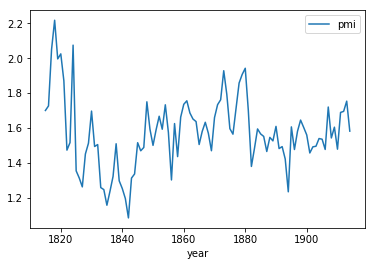

In [16]:
test = dfr[dfr.w1 == 'buitenlandsche']
test = test[test.w2 == 'afstand']
p =test.plot.line(x='year', y='pmi')

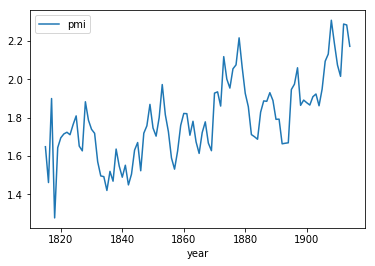